## Time Series Analysis applied on CO2 data

Time Series forecasting
* Linear regression
* Moving average
* Time series decomposition
* ARIMA
* Dynamic Regression Models
* Vector Autoregression
* Exponential Smoothing

Dataset used: "co2.csv" Global CO2 Emissions from fossil-fuels annually since 1751,downloaded from http://data.okfn.org/. This Data comes from the Carbon Dioxide Information Analysis Center (CDIAC)

In [1]:
# importing the necessary modules
import pandas as pd             # for data processing; csv file i/o (pd.read_csv)
import numpy as np              # for linear algebra and scientific calcs.
import matplotlib.pyplot as plt # for data visualizations
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)

In [2]:
# Loading the dataset
co2_df = pd.read_csv('C:/Users/sande/Major Project/Dataset/co2.csv',parse_dates=['Year'])
co2_df = co2_df.set_index('Year')
co2_df = co2_df['1950-01-01':]
co2_df['Year'] = co2_df.index
co2_df.head()

,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,Per Capita,Year
Year,,,,,,,,
1950-01-01,1630,97,423,1070,18,23,0.64,1950-01-01
1951-01-01,1767,115,479,1129,20,24,0.69,1951-01-01
1952-01-01,1795,124,504,1119,22,26,0.68,1952-01-01
1953-01-01,1841,131,533,1125,24,27,0.69,1953-01-01
1954-01-01,1865,138,557,1116,27,27,0.69,1954-01-01


In [3]:
# Dimensions of the dataset
print(co2_df.shape)

(61, 8)


In [4]:
co2_df.tail()

,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,Per Capita,Year
Year,,,,,,,,
2006-01-01,8370,1525,3089,3339,356,61,1.27,2006-01-01
2007-01-01,8566,1572,3081,3464,382,68,1.28,2007-01-01
2008-01-01,8783,1631,3122,3571,388,71,1.30,2008-01-01
2009-01-01,8740,1585,3056,3620,413,66,1.28,2009-01-01
2010-01-01,9167,1702,3114,3842,450,59,1.33,2010-01-01


In [5]:
print(co2_df.dtypes) # data types

Total                   int64
Gas Fuel                int64
Liquid Fuel             int64
Solid Fuel              int64
Cement                  int64
Gas Flaring             int64
Per Capita            float64
Year           datetime64[ns]
dtype: object


In [6]:
# no. of missing values in each column 
print(co2_df.isnull().sum())

Total          0
Gas Fuel       0
Liquid Fuel    0
Solid Fuel     0
Cement         0
Gas Flaring    0
Per Capita     0
Year           0
dtype: int64


In [7]:
co2_df = co2_df.drop_duplicates() 

In [8]:
co2_df.shape

(61, 8)

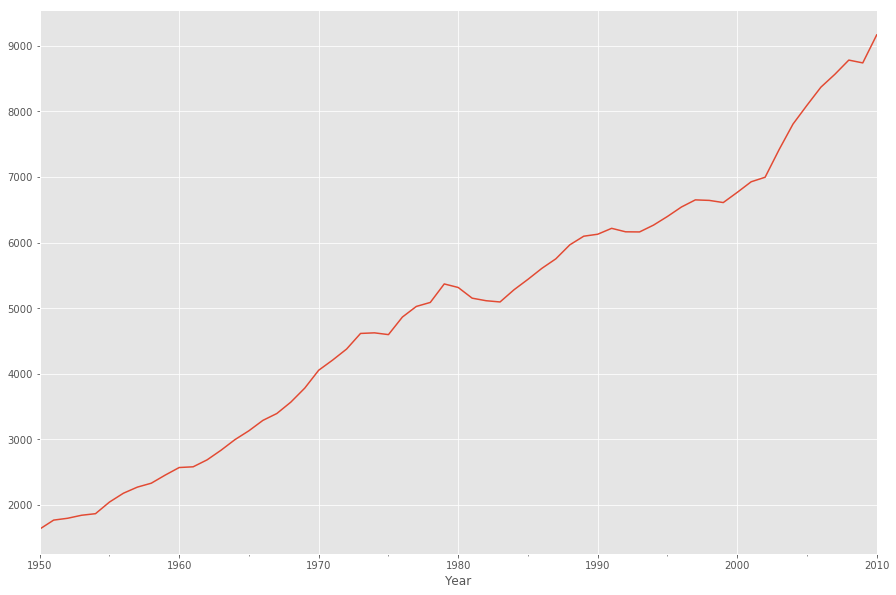

In [9]:
# plotting the total consumption of co2
co2_df.Total.plot()

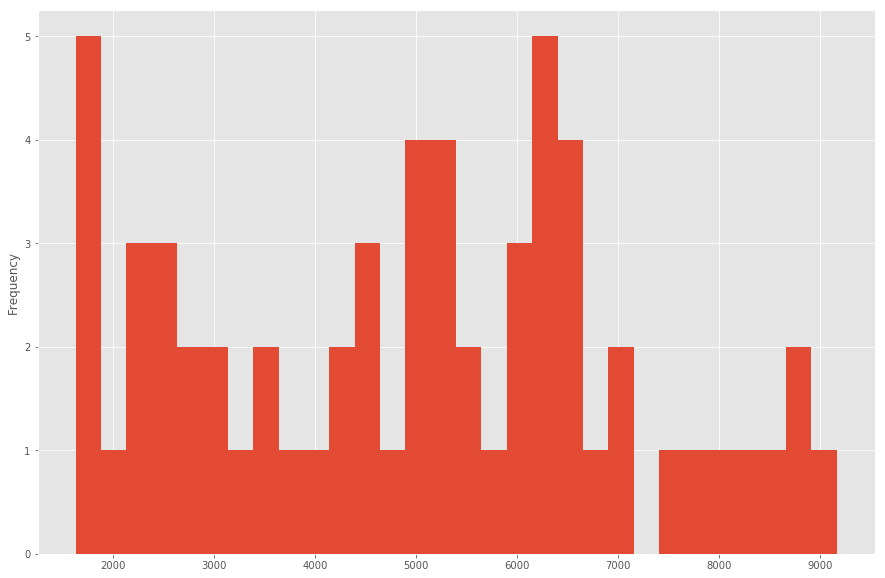

In [10]:
co2_df.Total.plot(kind = "hist", bins = 30)  #plotting histogram

In [11]:
#Applying Transformations like the logarithmic Transormation can help in providibg stability to the variance of the time series.
co2_df['TotalLog'] = np.log(co2_df.Total)
co2_df.head()

,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,Per Capita,Year,TotalLog
Year,,,,,,,,,
1950-01-01,1630,97,423,1070,18,23,0.64,1950-01-01,7.396335
1951-01-01,1767,115,479,1129,20,24,0.69,1951-01-01,7.477038
1952-01-01,1795,124,504,1119,22,26,0.68,1952-01-01,7.492760
1953-01-01,1841,131,533,1125,24,27,0.69,1953-01-01,7.518064
1954-01-01,1865,138,557,1116,27,27,0.69,1954-01-01,7.531016


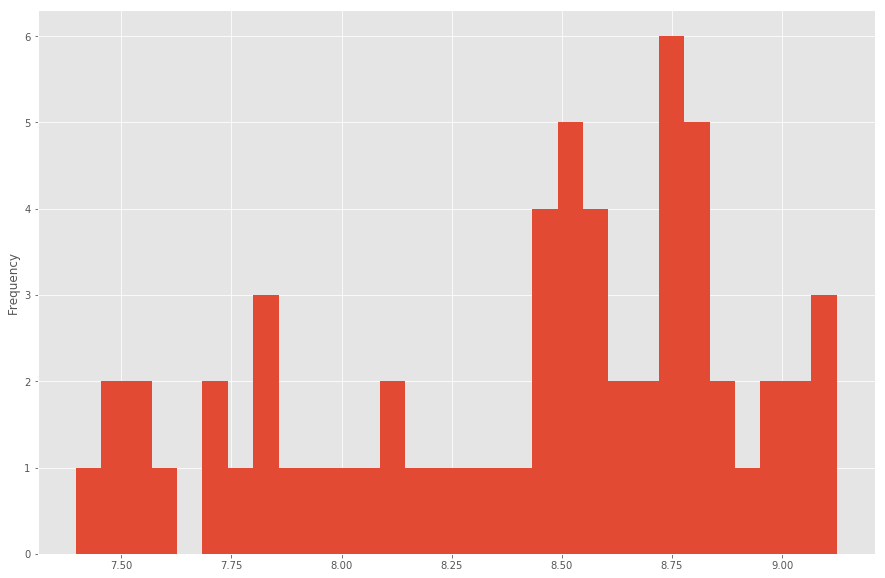

In [12]:
co2_df.TotalLog.plot(kind = "hist", bins = 30)

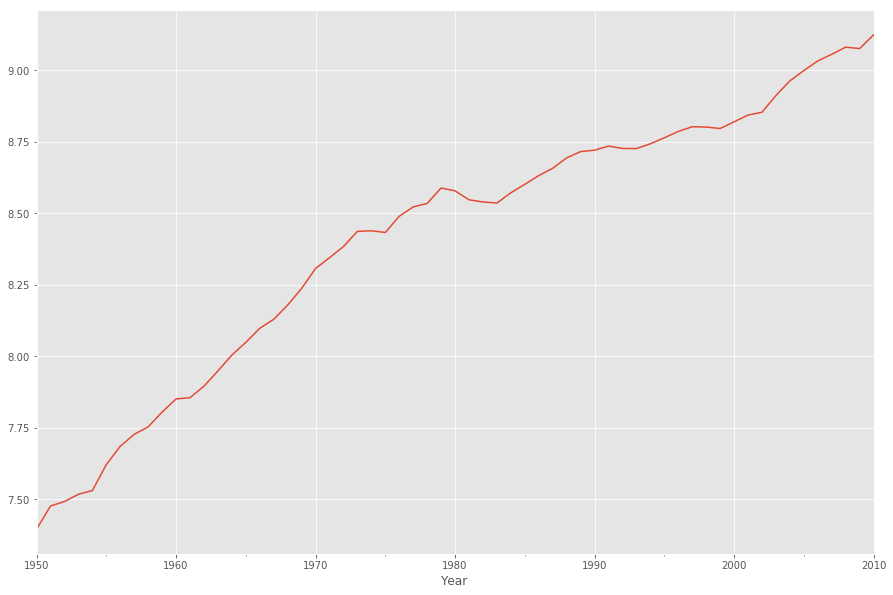

In [13]:
co2_df.TotalLog.plot()

## Basic Time Series Model
* Mean Constant Model
* Linear Trend Model
* Random Walk Model

### Mean Constant Model

In [14]:
model_mean_pred = co2_df.TotalLog.mean()  #applying mean model

In [15]:
co2_df["TotalMean"] = np.exp(model_mean_pred)

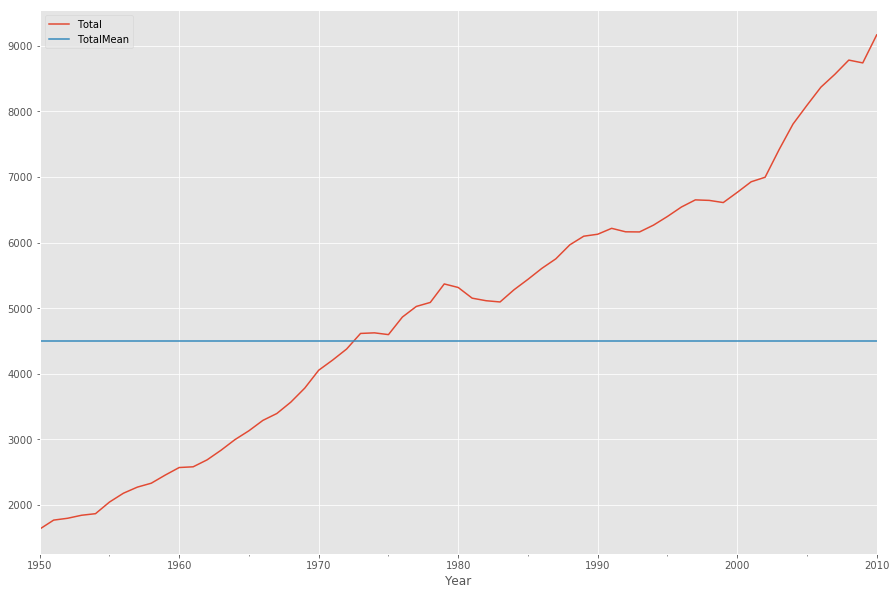

In [16]:
co2_df.plot(kind="line", x="Year", y = ["Total", "TotalMean"])

We will use Root Mean Squared Error (RMSE) to calculate our error values

$RMSE = \Sigma \sqrt{ (\hat{y} - y)^2/n} $ , where $\hat{y}$ is  predicted value of y

In [17]:
def RMSE(forecasted_value, actual_value):
    mse = (forecasted_value - actual_value)**2
    rmse_value = np.sqrt(mse.sum()/mse.count())
    return rmse_value

In [18]:
model_mean_RMSE = RMSE(co2_df.TotalMean, co2_df.Total)
model_mean_RMSE

2109.3131625122851

In [19]:
# Save the results in the dataframe object
co2_dfResults = pd.DataFrame(columns = ["Model_Name", "Forecast", "RMSE_value"])
co2_dfResults.head()

,Model,Forecast,RMSE


In [20]:
co2_dfResults.loc[0,"Model_Name"] = "Mean"
co2_dfResults.loc[0,"Forecast"] = np.exp(model_mean_pred)
co2_dfResults.loc[0,"RMSE_value"] = model_mean_RMSE
co2_dfResults.head()

,Model,Forecast,RMSE
0,Mean,4503.35,2109.31


### Linear Trend Model

In [21]:
co2_df.Year.min()

Timestamp('1950-01-01 00:00:00')

In [22]:
# Converting the date in datetimedelta figure starting from 0
co2_df["time_Index"] = co2_df.Year - co2_df.Year.min()

In [23]:
co2_df.head()

,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,Per Capita,Year,TotalLog,TotalMean,time_Index
Year,,,,,,,,,,,
1950-01-01,1630,97,423,1070,18,23,0.64,1950-01-01,7.396335,4503.354719,0 days
1951-01-01,1767,115,479,1129,20,24,0.69,1951-01-01,7.477038,4503.354719,365 days
1952-01-01,1795,124,504,1119,22,26,0.68,1952-01-01,7.492760,4503.354719,730 days
1953-01-01,1841,131,533,1125,24,27,0.69,1953-01-01,7.518064,4503.354719,1096 days
1954-01-01,1865,138,557,1116,27,27,0.69,1954-01-01,7.531016,4503.354719,1461 days


In [24]:
# Import statsmodel
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
# Convert to months using the timedelta function
co2_df["time_Index"] =  co2_df["time_Index"]/np.timedelta64(1, 'Y')

C:\Users\sande\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [25]:
# Round the number to 0
co2_df["time_Index"] = co2_df["time_Index"].round(0).astype(int)

In [26]:
## Now plot linear regression between priceMod and timeIndex
linear_model = smf.ols('TotalLog ~ time_Index', data = co2_df).fit()

In [27]:
co2_df.head()

,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,Per Capita,Year,TotalLog,TotalMean,time_Index
Year,,,,,,,,,,,
1950-01-01,1630,97,423,1070,18,23,0.64,1950-01-01,7.396335,4503.354719,0
1951-01-01,1767,115,479,1129,20,24,0.69,1951-01-01,7.477038,4503.354719,1
1952-01-01,1795,124,504,1119,22,26,0.68,1952-01-01,7.492760,4503.354719,2
1953-01-01,1841,131,533,1125,24,27,0.69,1953-01-01,7.518064,4503.354719,3
1954-01-01,1865,138,557,1116,27,27,0.69,1954-01-01,7.531016,4503.354719,4


In [28]:
co2_df.tail()

,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,Per Capita,Year,TotalLog,TotalMean,time_Index
Year,,,,,,,,,,,
2006-01-01,8370,1525,3089,3339,356,61,1.27,2006-01-01,9.032409,4503.354719,56
2007-01-01,8566,1572,3081,3464,382,68,1.28,2007-01-01,9.055556,4503.354719,57
2008-01-01,8783,1631,3122,3571,388,71,1.30,2008-01-01,9.080573,4503.354719,58
2009-01-01,8740,1585,3056,3620,413,66,1.28,2009-01-01,9.075665,4503.354719,59
2010-01-01,9167,1702,3114,3842,450,59,1.33,2010-01-01,9.123365,4503.354719,60


In [29]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               TotalLog   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     963.1
Date:                Sun, 01 Apr 2018   Prob (F-statistic):           3.07e-38
Time:                        20:11:46   Log-Likelihood:                 45.824
No. Observations:                  61   AIC:                            -87.65
Df Residuals:                      59   BIC:                            -83.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.6267      0.029    259.736      0.000       7.568       7.685
time_Index     0.0262      0.001     31.035      0.000       0.025       0.028
==============================================================================
Omnibus:                        4.708   Durbin-Watson:                   0.046
Prob(Omnibus):                  0.095   Jarque-Bera (JB):                2.237
Skew:                           0.148   Prob(JB):                        0.327
Kurtosis:                       2.110   Cond. No.                         68.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
linear_model.params

Intercept     7.626660
time_Index    0.026197
dtype: float64

In [31]:
linear_model_pred = linear_model.predict()

In [32]:
linear_model_pred

array([ 7.62665967,  7.65285695,  7.67905422,  7.70525149,  7.73144877,
        7.75764604,  7.78384332,  7.81004059,  7.83623786,  7.86243514,
        7.88863241,  7.91482969,  7.94102696,  7.96722423,  7.99342151,
        8.01961878,  8.04581606,  8.07201333,  8.0982106 ,  8.12440788,
        8.15060515,  8.17680243,  8.2029997 ,  8.22919697,  8.25539425,
        8.28159152,  8.3077888 ,  8.33398607,  8.36018334,  8.38638062,
        8.41257789,  8.43877517,  8.46497244,  8.49116971,  8.51736699,
        8.54356426,  8.56976154,  8.59595881,  8.62215608,  8.64835336,
        8.67455063,  8.70074791,  8.72694518,  8.75314245,  8.77933973,
        8.805537  ,  8.83173428,  8.85793155,  8.88412882,  8.9103261 ,
        8.93652337,  8.96272065,  8.98891792,  9.01511519,  9.04131247,
        9.06750974,  9.09370702,  9.11990429,  9.14610156,  9.17229884,
        9.19849611])

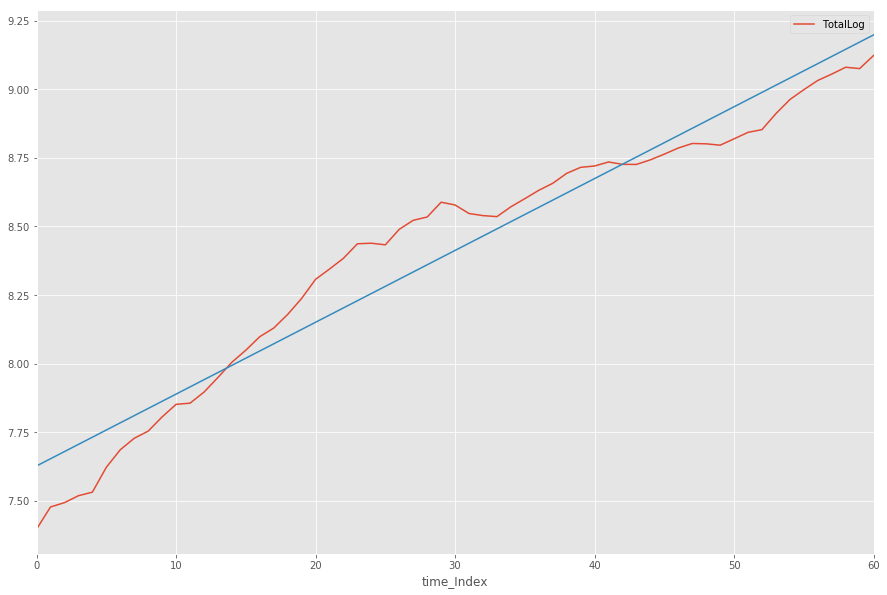

In [33]:
# Plot the prediction line
co2_df.plot(kind="line", x="time_Index", y = "TotalLog")
plt.plot(co2_df.time_Index,linear_model_pred, '-')

lag-1 autocorrelation and Durbin-Watson statistic

In [34]:
c = linear_model.params[0]
c

7.6266596712451236

In [35]:
m = linear_model.params[1]
m

0.026197273998420041

In [36]:
# Manual Calculation
linear_model_forecast_manual = m * 61 + c
linear_model_forecast_manual

9.2246933851487469

In [37]:
co2_df["TotalLinear"] = np.exp(linear_model_pred)

In [38]:
co2_df.head()

,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,Per Capita,Year,TotalLog,TotalMean,time_Index,TotalLinear
Year,,,,,,,,,,,,
1950-01-01,1630,97,423,1070,18,23,0.64,1950-01-01,7.396335,4503.354719,0,2052.183590
1951-01-01,1767,115,479,1129,20,24,0.69,1951-01-01,7.477038,4503.354719,1,2106.655600
1952-01-01,1795,124,504,1119,22,26,0.68,1952-01-01,7.492760,4503.354719,2,2162.573484
1953-01-01,1841,131,533,1125,24,27,0.69,1953-01-01,7.518064,4503.354719,3,2219.975621
1954-01-01,1865,138,557,1116,27,27,0.69,1954-01-01,7.531016,4503.354719,4,2278.901408


In [39]:
# Root Mean Squared Error (RMSE)
linear_model_RMSE = RMSE(co2_df.TotalLinear, co2_df.Total)
linear_model_RMSE

526.78973659625319

In [40]:
co2_dfResults.loc[1,"Model_Name"] = "Linear"
co2_dfResults.loc[1,"Forecast"] = np.exp(linear_model_forecast_manual)
co2_dfResults.loc[1,"RMSE_value"] = linear_model_RMSE
co2_dfResults.head()

,Model,Forecast,RMSE
0,Mean,4503.35,2109.31
1,Linear,10144.6,526.79


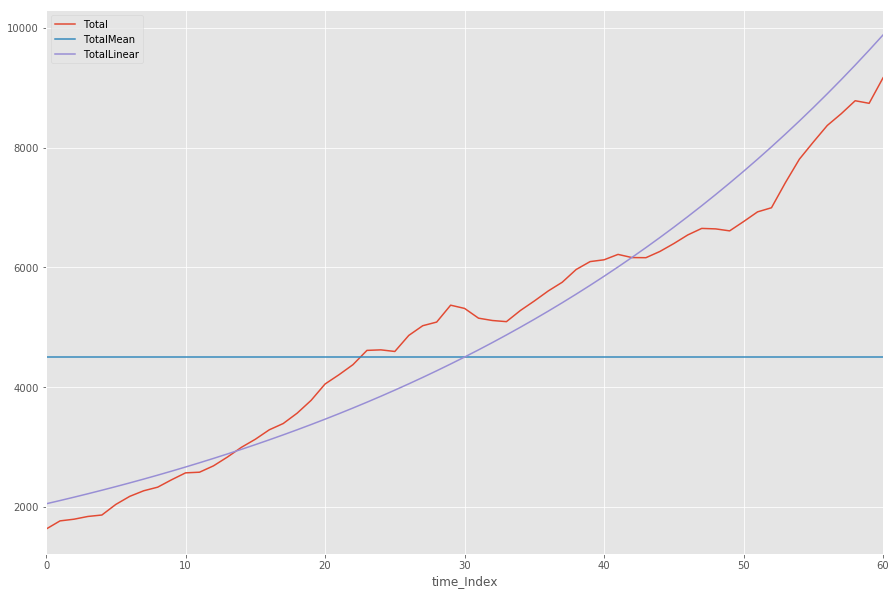

In [41]:
co2_df.plot(kind="line", x="time_Index", y = ["Total", "TotalMean", "TotalLinear"])

### Random walk model

In [42]:
co2_df["TotalLogShift1"] = co2_df.TotalLog.shift()

In [43]:
co2_df.head()

,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,Per Capita,Year,TotalLog,TotalMean,time_Index,TotalLinear,TotalLogShift1
Year,,,,,,,,,,,,,
1950-01-01,1630,97,423,1070,18,23,0.64,1950-01-01,7.396335,4503.354719,0,2052.183590,NaN
1951-01-01,1767,115,479,1129,20,24,0.69,1951-01-01,7.477038,4503.354719,1,2106.655600,7.396335
1952-01-01,1795,124,504,1119,22,26,0.68,1952-01-01,7.492760,4503.354719,2,2162.573484,7.477038
1953-01-01,1841,131,533,1125,24,27,0.69,1953-01-01,7.518064,4503.354719,3,2219.975621,7.492760
1954-01-01,1865,138,557,1116,27,27,0.69,1954-01-01,7.531016,4503.354719,4,2278.901408,7.518064


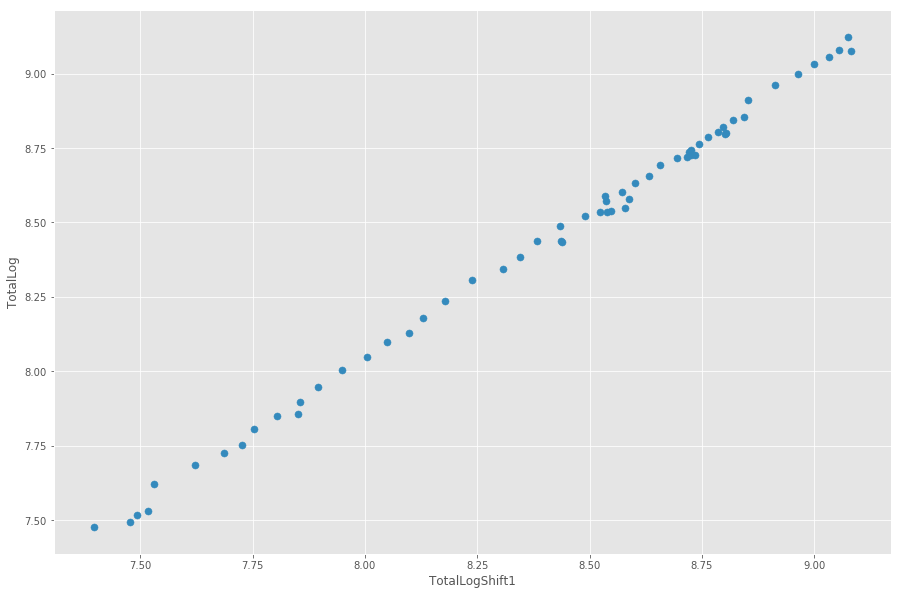

In [44]:
co2_df.plot(kind= "scatter", y = "TotalLog", x = "TotalLogShift1", s = 50)

In [45]:
co2_df["TotalLogDiff"] = co2_df.TotalLog - co2_df.TotalLogShift1

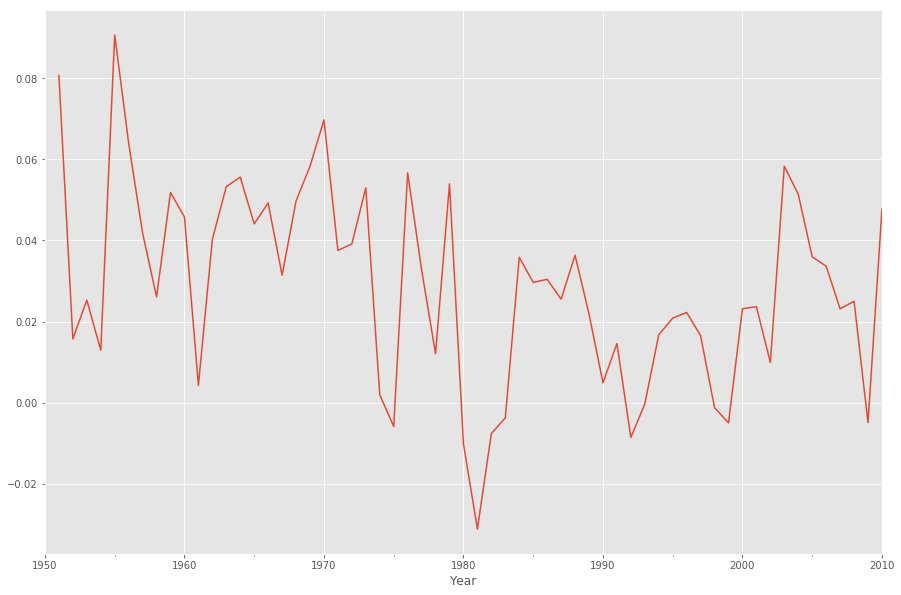

In [46]:
co2_df.TotalLogDiff.plot()

In [47]:
co2_df["totalRandom"] = np.exp(co2_df.TotalLogShift1)
co2_df.head()

,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,Per Capita,Year,TotalLog,TotalMean,time_Index,TotalLinear,TotalLogShift1,TotalLogDiff,totalRandom
Year,,,,,,,,,,,,,,,
1950-01-01,1630,97,423,1070,18,23,0.64,1950-01-01,7.396335,4503.354719,0,2052.183590,NaN,NaN,NaN
1951-01-01,1767,115,479,1129,20,24,0.69,1951-01-01,7.477038,4503.354719,1,2106.655600,7.396335,0.080703,1630.0
1952-01-01,1795,124,504,1119,22,26,0.68,1952-01-01,7.492760,4503.354719,2,2162.573484,7.477038,0.015722,1767.0
1953-01-01,1841,131,533,1125,24,27,0.69,1953-01-01,7.518064,4503.354719,3,2219.975621,7.492760,0.025304,1795.0
1954-01-01,1865,138,557,1116,27,27,0.69,1954-01-01,7.531016,4503.354719,4,2278.901408,7.518064,0.012952,1841.0


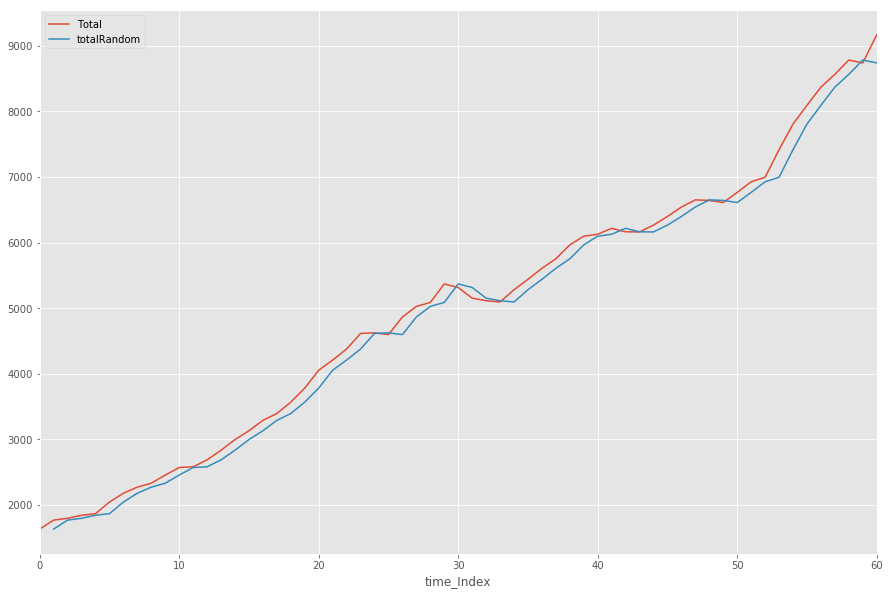

In [48]:
co2_df.plot(kind="line", x="time_Index", y = ["Total","totalRandom"])

In [49]:
# Root Mean Squared Error (RMSE)
random_model_RMSE = RMSE(co2_df.totalRandom, co2_df.Total)
random_model_RMSE

171.12232466864208

In [50]:
co2_dfResults.loc[2,"Model_Name"] = "Random"
co2_dfResults.loc[2,"Forecast"] = np.exp(co2_df.TotalLogShift1[-1])
co2_dfResults.loc[2,"RMSE_value"] = random_model_RMSE
co2_dfResults.head()

,Model,Forecast,RMSE
0,Mean,4503.35,2109.31
1,Linear,10144.6,526.79
2,Random,8740,171.122


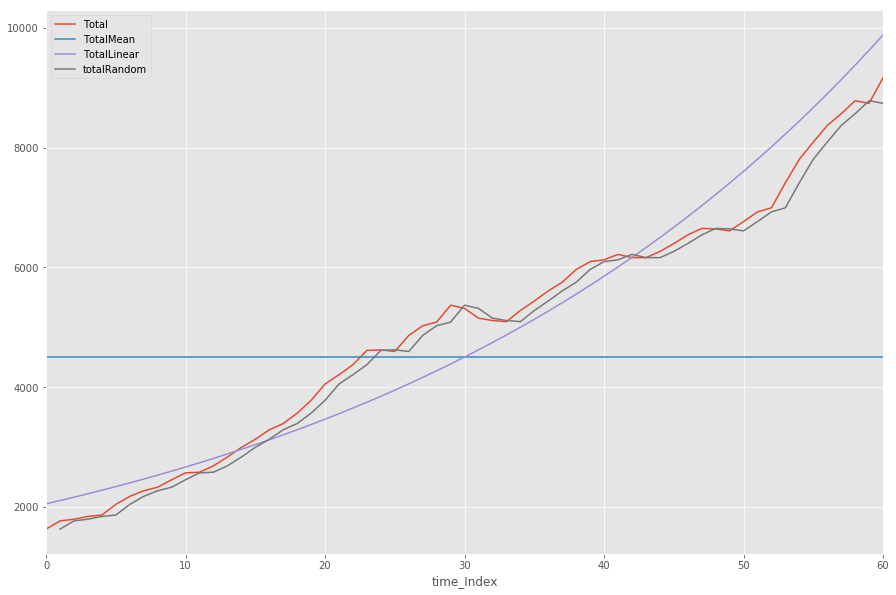

In [51]:
co2_df.plot(kind="line", x="time_Index", y = ["Total", "TotalMean", "TotalLinear", "totalRandom"])

Statistical stationarity: A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time. 

How do we check for Stationarity in a series?
* Plotting Rolling Statistics: We can plot the moving average or moving variance and see if it varies with time. By moving average/variance I mean that at any instant ‘t’, we’ll take the average/variance of the last year, i.e. last 12 months. But again this is more of a visual technique.
* Dickey-Fuller Test: This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the time series is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.

#### Dickey Fuller Test of Stationarity

In [52]:
def dickey_fuller_test(time_series):
    
    # Finding the rolling statistics i.e rolling meand and std
    rol_mean = pd.rolling_mean(time_series, window=12)  #window is windowsize
    rol_std = pd.rolling_std(time_series, window=12)

    #Plotting the rolling statistics:
    orig_ = plt.plot(time_series, color='blue',label='Original')  #original value
    mean_ = plt.plot(rol_mean, color='red', label='Rolling Mean')
    std_ = plt.plot(rol_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('The Rolling Mean and Std. Deviation')
    plt.show(block=False)
    
    # Calculate the ADF test factors
    adf_test = adfuller(time_series, autolag='AIC')  #measuring AIC scores
    adf_output = pd.Series(adf_test[0:4], index=['Test Statistic','p-value','# of Lags Used',
                                              'Number of Observations Used'])
    for key,value in adf_test[4].items():
        adf_output['Critical Value (%s)'%key] = value
    return adf_output

There are three main reasons behind the non-stationarity of time series:

* Trend: A trend is there when there is long-term decrease or increase in the data. It does not have to be linear. Sometimes we will refer to a trend “changing direction” when it might go from an increasing trend to a decreasing trend.
* Seasonal: A seasonal pattern exists when a series is influenced by seasonal factors (e.g., the quarter of the year, the month, or day of the week). Seasonality is always of a fixed and known period.
* Cyclic: A cyclic pattern exists when data exhibit rises and falls that are not of fixed period. The duration of these fluctuations is usually of at least 2 years

#### Simple Moving Average

In [53]:
# For smoothing the values we can use 12 month Moving Averages 
co2_df['TotalLogMA12'] = pd.rolling_mean(co2_df.TotalLog, window = 12)

C:\Users\sande\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  


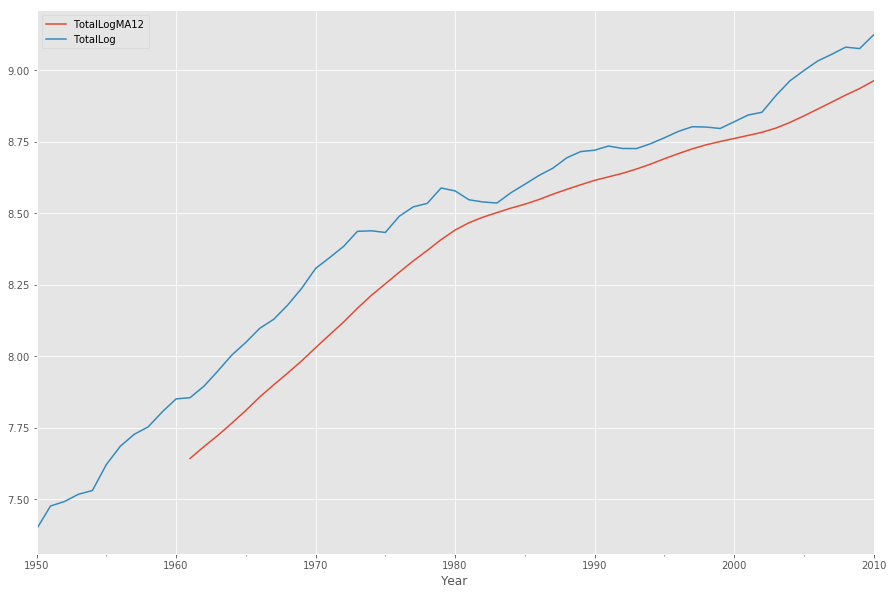

In [54]:
co2_df.plot(kind ="line", y=["TotalLogMA12", "TotalLog"])

In [55]:
co2_df["TotalMA12"] = np.exp(co2_df.TotalLogMA12)
co2_df.tail()

,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,Per Capita,Year,TotalLog,TotalMean,time_Index,TotalLinear,TotalLogShift1,TotalLogDiff,totalRandom,TotalLogMA12,TotalMA12
Year,,,,,,,,,,,,,,,,,
2006-01-01,8370,1525,3089,3339,356,61,1.27,2006-01-01,9.032409,4503.354719,56,8899.114133,8.998755,0.033654,8093.0,8.864254,7074.513727
2007-01-01,8566,1572,3081,3464,382,68,1.28,2007-01-01,9.055556,4503.354719,57,9135.327225,9.032409,0.023147,8370.0,8.888572,7248.660283
2008-01-01,8783,1631,3122,3571,388,71,1.30,2008-01-01,9.080573,4503.354719,58,9377.810224,9.055556,0.025017,8566.0,8.913120,7428.801860
2009-01-01,8740,1585,3056,3620,413,66,1.28,2009-01-01,9.075665,4503.354719,59,9626.729556,9.080573,-0.004908,8783.0,8.935882,7599.834744
2010-01-01,9167,1702,3114,3842,450,59,1.33,2010-01-01,9.123365,4503.354719,60,9882.256063,9.075665,0.047700,8740.0,8.962719,7806.554519


In [56]:
model_MA12_forecast = co2_df.TotalLog.tail(12).mean()

In [57]:
# Root Mean Squared Error (RMSE)
model_MA12_RMSE = RMSE(co2_df.TotalMA12, co2_df.Total)
model_MA12_RMSE

763.35174958437335

In [58]:
co2_dfResults.loc[3,"Model_Name"] = "Moving Average 12"
co2_dfResults.loc[3,"Forecast"] = np.exp(model_MA12_forecast)
co2_dfResults.loc[3,"RMSE_value"] = model_MA12_RMSE
co2_dfResults.head()

,Model,Forecast,RMSE
0,Mean,4503.35,2109.31
1,Linear,10144.6,526.79
2,Random,8740,171.122
3,Moving Average 12,7806.55,763.352


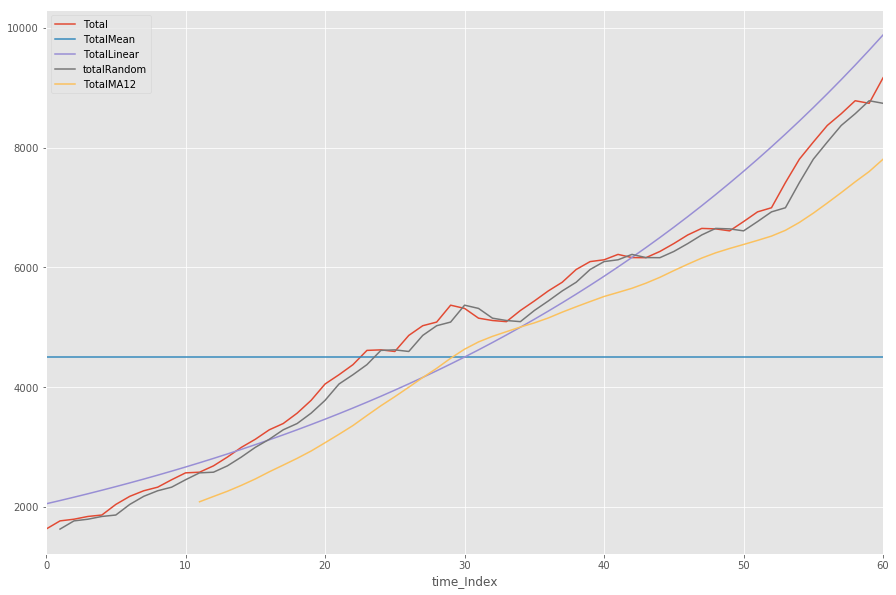

In [59]:
co2_df.plot(kind="line", x="time_Index", y = ["Total", "TotalMean", "TotalLinear",
                                             "totalRandom", "TotalMA12"])

C:\Users\sande\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  after removing the cwd from sys.path.
C:\Users\sande\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  """


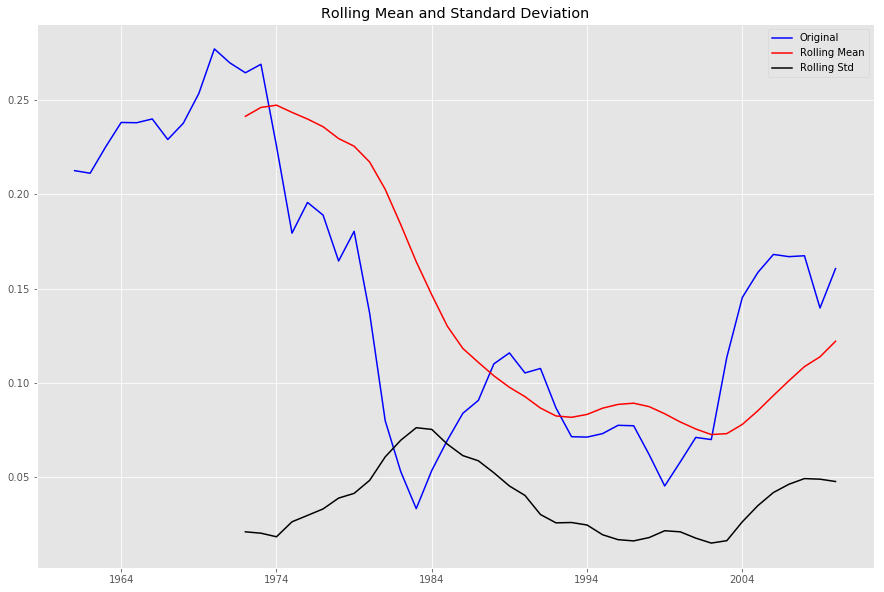

Test Statistic                 -2.172811
p-value                         0.216261
# of Lags Used                  7.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64

In [60]:
# Test remaining part for Stationary
ts = co2_df.TotalLog - co2_df.TotalLogMA12
ts.dropna(inplace = True)
dickey_fuller_test(ts)

#### Simple Exponential Smoothing Model 

Instead of equally weighting each of the observation, we give more weightage to the recent observations and less to the older ones.

In [61]:
co2_df['TotalLogExp12'] = pd.ewma(co2_df.TotalLog, halflife=12)

C:\Users\sande\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=12,min_periods=0,adjust=True,ignore_na=False).mean()
  """Entry point for launching an IPython kernel.


In [62]:
halflife = 12
alpha = 1 - np.exp(np.log(0.5)/halflife)
alpha

0.056125687318306472

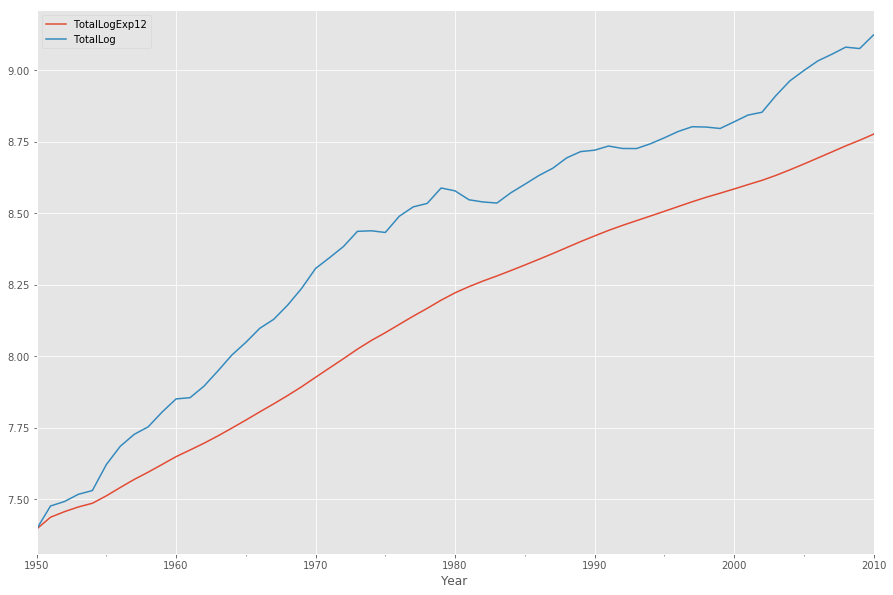

In [63]:
co2_df.plot(kind ="line", y=["TotalLogExp12", "TotalLog"])

In [64]:
co2_df["TotalExp12"] = np.exp(co2_df.TotalLogExp12)
co2_df.tail()

,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,Per Capita,Year,TotalLog,TotalMean,time_Index,TotalLinear,TotalLogShift1,TotalLogDiff,totalRandom,TotalLogMA12,TotalMA12,TotalLogExp12,TotalExp12
Year,,,,,,,,,,,,,,,,,,,
2006-01-01,8370,1525,3089,3339,356,61,1.27,2006-01-01,9.032409,4503.354719,56,8899.114133,8.998755,0.033654,8093.0,8.864254,7074.513727,8.693113,5961.713293
2007-01-01,8566,1572,3081,3464,382,68,1.28,2007-01-01,9.055556,4503.354719,57,9135.327225,9.032409,0.023147,8370.0,8.888572,7248.660283,8.714195,6088.731408
2008-01-01,8783,1631,3122,3571,388,71,1.30,2008-01-01,9.080573,4503.354719,58,9377.810224,9.055556,0.025017,8566.0,8.913120,7428.801860,8.735462,6219.609416
2009-01-01,8740,1585,3056,3620,413,66,1.28,2009-01-01,9.075665,4503.354719,59,9626.729556,9.080573,-0.004908,8783.0,8.935882,7599.834744,8.755172,6343.414457
2010-01-01,9167,1702,3114,3842,450,59,1.33,2010-01-01,9.123365,4503.354719,60,9882.256063,9.075665,0.047700,8740.0,8.962719,7806.554519,8.776466,6479.933999


In [65]:
# Root Mean Squared Error (RMSE)
model_Exp12_RMSE = RMSE(co2_df.TotalExp12, co2_df.Total)
model_Exp12_RMSE

1406.344621913466

In [66]:
y_exp = co2_df.TotalLog[-1]
y_exp

9.1233653579617755

In [67]:
y_for = co2_df.TotalLogExp12[-1]
y_for

8.7764656039073063

In [68]:
model_Exp12_forecast = alpha * y_exp + (1 - alpha) * y_for

In [69]:
co2_dfResults.loc[4,"Model_Name"] = "Exp Smoothing 12"
co2_dfResults.loc[4,"Forecast"] = np.exp(model_Exp12_forecast)
co2_dfResults.loc[4,"RMSE_value"] = model_Exp12_RMSE
co2_dfResults.head()

,Model,Forecast,RMSE
0,Mean,4503.35,2109.31
1,Linear,10144.6,526.79
2,Random,8740,171.122
3,Moving Average 12,7806.55,763.352
4,Exp Smoothing 12,6607.33,1406.34


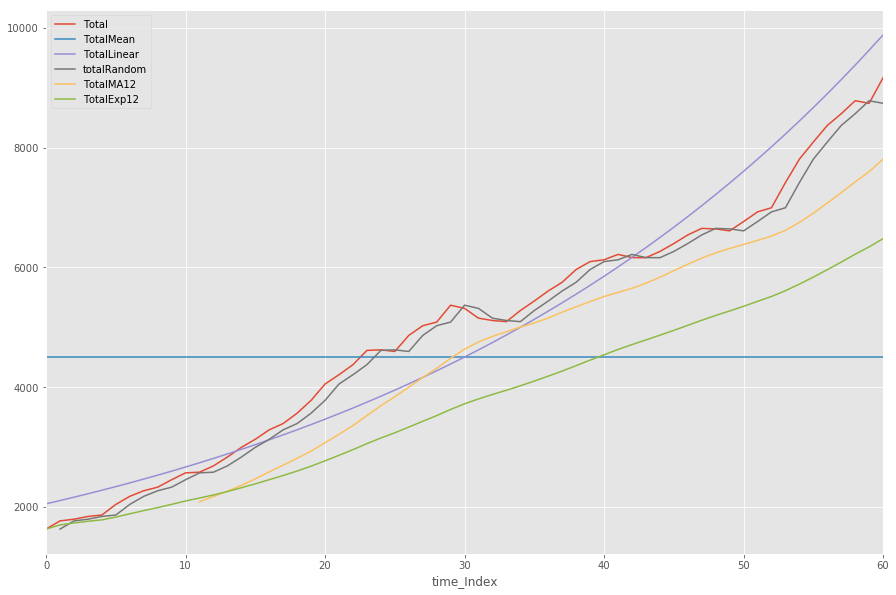

In [70]:
co2_df.plot(kind="line", x="time_Index", y = ["Total", "TotalMean", "TotalLinear", 
                                             "totalRandom",
                                             "TotalMA12", "TotalExp12"])

C:\Users\sande\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  after removing the cwd from sys.path.
C:\Users\sande\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  """


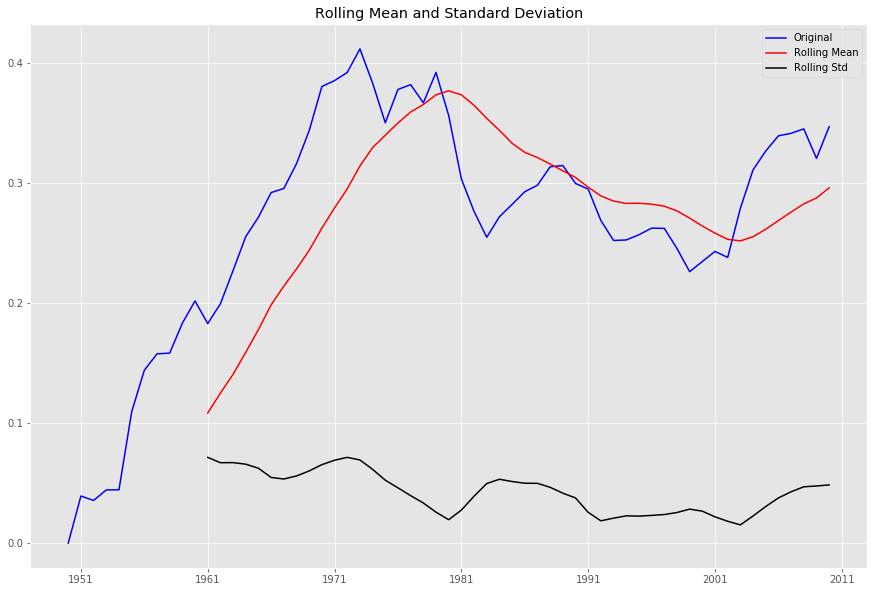

Test Statistic                 -2.003647
p-value                         0.284976
# of Lags Used                  7.000000
Number of Observations Used    53.000000
Critical Value (1%)            -3.560242
Critical Value (5%)            -2.917850
Critical Value (10%)           -2.596796
dtype: float64

In [71]:
# Test remaining part for Stationary
ts = co2_df.TotalLog - co2_df.TotalLogExp12
ts.dropna(inplace = True)
dickey_fuller_test(ts)

Eliminating Trend and Seasonality
Differencing – taking the difference with a particular time lag
Decomposition – modeling both trend and seasonality and removing them from the mode

#### Differencing

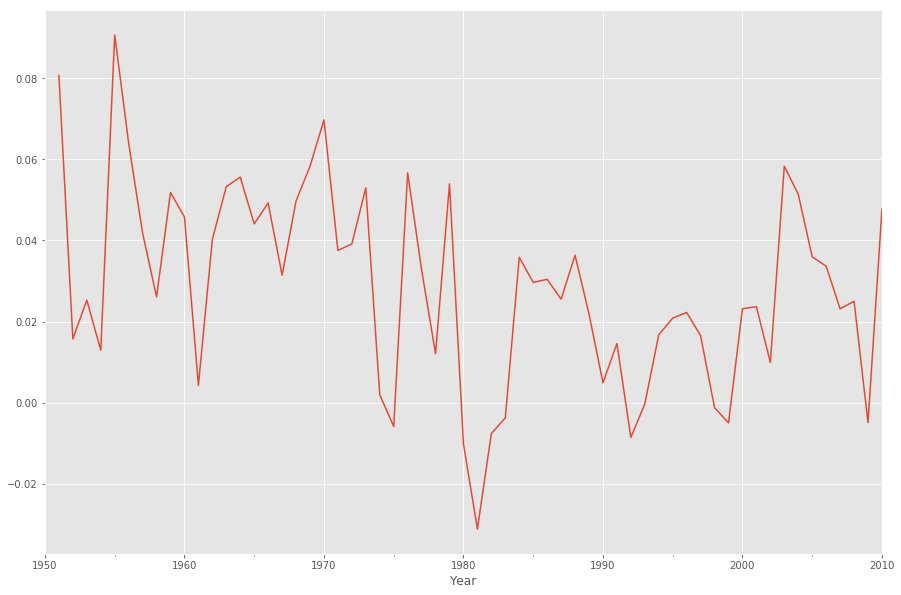

In [72]:
co2_df.TotalLogDiff.plot()

C:\Users\sande\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  after removing the cwd from sys.path.
C:\Users\sande\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  """


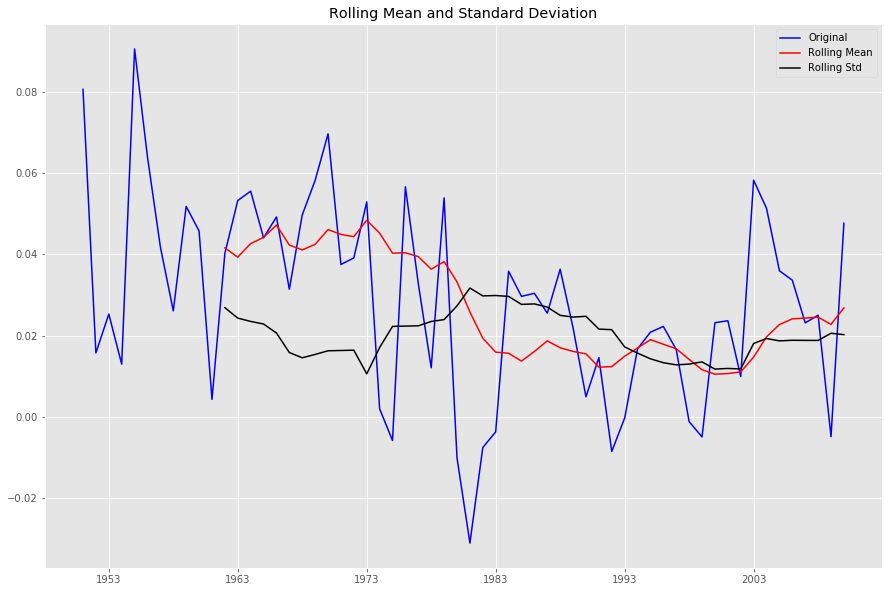

Test Statistic                 -5.436385
p-value                         0.000003
# of Lags Used                  0.000000
Number of Observations Used    59.000000
Critical Value (1%)            -3.546395
Critical Value (5%)            -2.911939
Critical Value (10%)           -2.593652
dtype: float64

In [73]:
# Test remaining part for Stationary
ts = co2_df.TotalLogDiff
ts.dropna(inplace = True)
dickey_fuller_test(ts)

#### Decomposition

In [74]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [75]:
co2_df.index = co2_df.index.to_datetime()

In [76]:
co2_df.head()

,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,Per Capita,Year,TotalLog,TotalMean,time_Index,TotalLinear,TotalLogShift1,TotalLogDiff,totalRandom,TotalLogMA12,TotalMA12,TotalLogExp12,TotalExp12
Year,,,,,,,,,,,,,,,,,,,
1950-01-01,1630,97,423,1070,18,23,0.64,1950-01-01,7.396335,4503.354719,0,2052.183590,NaN,NaN,NaN,NaN,NaN,7.396335,1630.000000
1951-01-01,1767,115,479,1129,20,24,0.69,1951-01-01,7.477038,4503.354719,1,2106.655600,7.396335,0.080703,1630.0,NaN,NaN,7.437852,1699.096569
1952-01-01,1795,124,504,1119,22,26,0.68,1952-01-01,7.492760,4503.354719,2,2162.573484,7.477038,0.015722,1767.0,NaN,NaN,7.457222,1732.328145
1953-01-01,1841,131,533,1125,24,27,0.69,1953-01-01,7.518064,4503.354719,3,2219.975621,7.492760,0.025304,1795.0,NaN,NaN,7.473774,1761.241680
1954-01-01,1865,138,557,1116,27,27,0.69,1954-01-01,7.531016,4503.354719,4,2278.901408,7.518064,0.012952,1841.0,NaN,NaN,7.486582,1783.944066


In [77]:
decomposition = seasonal_decompose(co2_df.TotalLog, model = "additive")

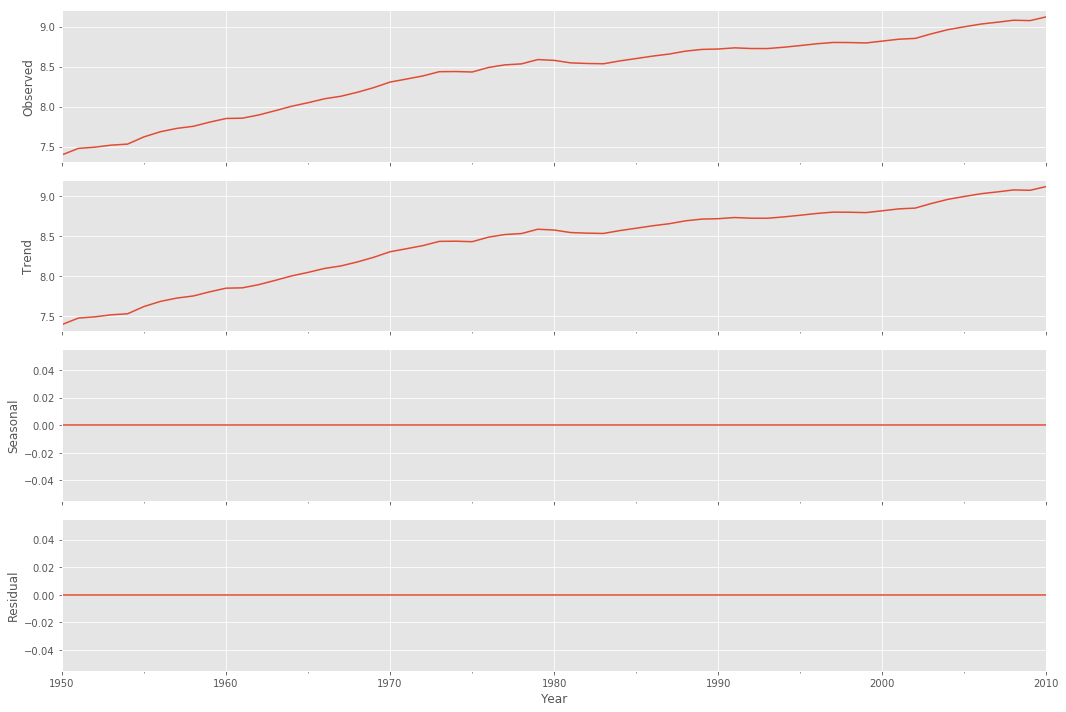

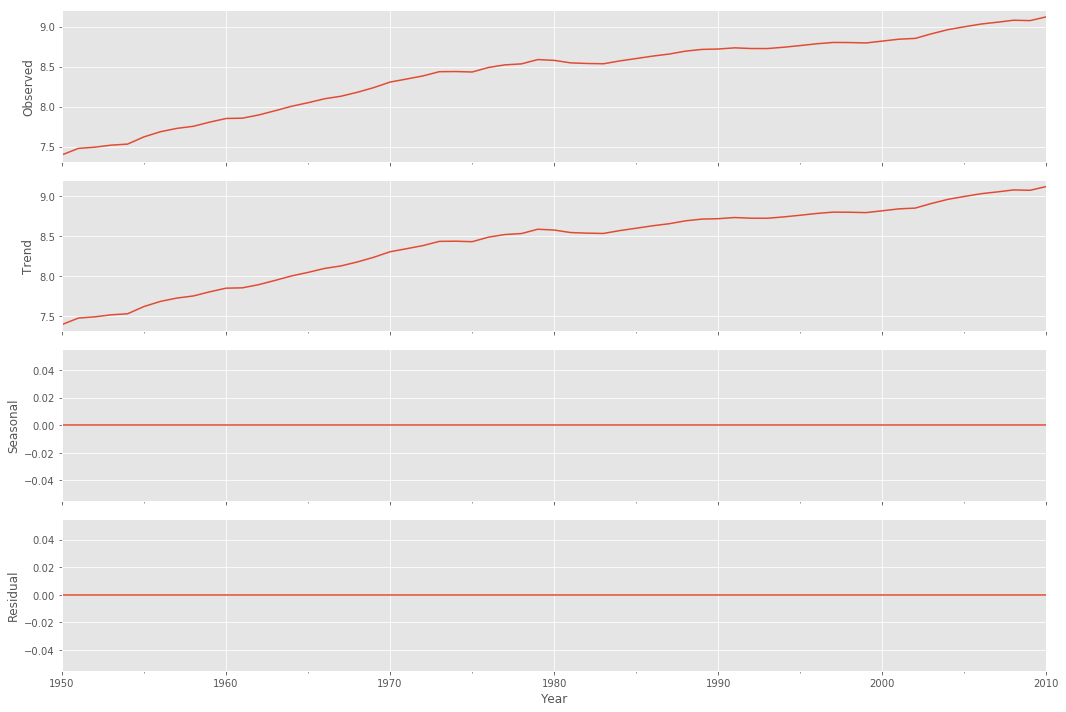

In [78]:
decomposition.plot()

In [79]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [80]:
co2_df["TotalDecomp"] = np.exp(trend + seasonal)

In [81]:
# Root Mean Squared Error (RMSE)
model_Decomp_RMSE = RMSE(co2_df.TotalDecomp, co2_df.Total)
model_Decomp_RMSE

2.905393320948834e-12

#### ARIMA

In [82]:
ts = co2_df.TotalLog
ts_diff = co2_df.TotalLogDiff
ts_diff.dropna(inplace = True)

In [83]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [84]:
lag_acf = acf(ts_diff, nlags=20)

In [85]:
lag_acf

array([ 1.        ,  0.34934276,  0.15679006,  0.18204298,  0.15458921,
        0.04166017,  0.14788712,  0.24223833,  0.19105987,  0.2112431 ,
        0.06911225,  0.00844078, -0.01004628,  0.05624051,  0.05974253,
        0.0729601 ,  0.04762091,  0.11062729,  0.03406595, -0.00143906,
       -0.05652388])

In [86]:
ACF = pd.Series(lag_acf)

In [87]:
ACF

0     1.000000
1     0.349343
2     0.156790
3     0.182043
4     0.154589
5     0.041660
6     0.147887
7     0.242238
8     0.191060
9     0.211243
10    0.069112
11    0.008441
12   -0.010046
13    0.056241
14    0.059743
15    0.072960
16    0.047621
17    0.110627
18    0.034066
19   -0.001439
20   -0.056524
dtype: float64

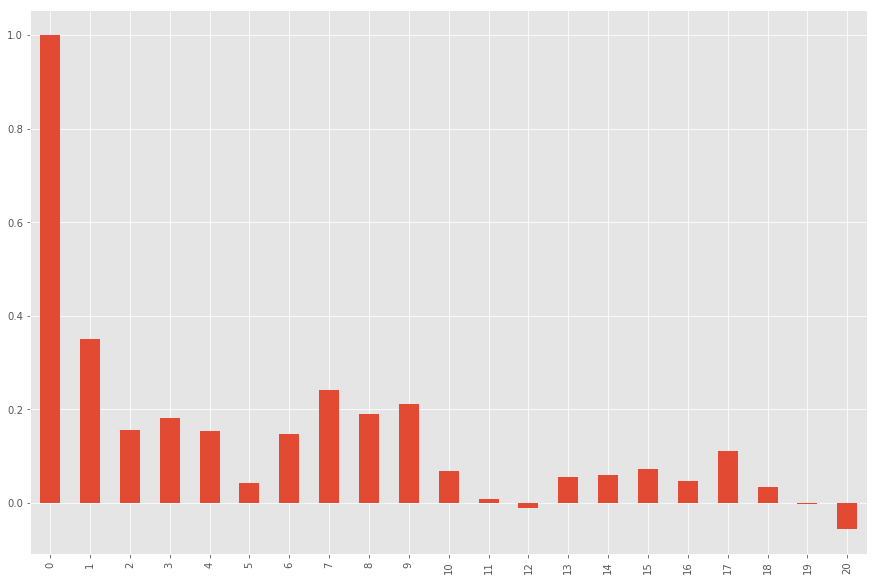

In [88]:
ACF.plot(kind = "bar")

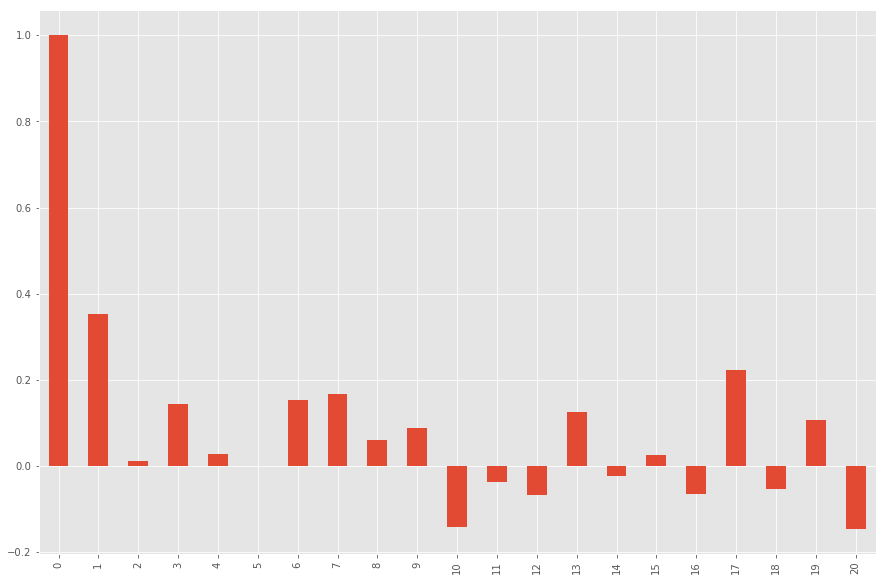

In [89]:
lag_pacf = pacf(ts_diff, nlags=20, method='ols')
PACF = pd.Series(lag_pacf)
PACF.plot(kind = "bar")

In [90]:
from statsmodels.tsa.arima_model import ARIMA

In [91]:
ts_diff.head()

Year
1951-01-01    0.080703
1952-01-01    0.015722
1953-01-01    0.025304
1954-01-01    0.012952
1955-01-01    0.090669
Name: TotalLogDiff, dtype: float64

In [92]:
# Running the ARIMA Model(1,0,1)
model_AR1MA = ARIMA(ts_diff, order=(1,0,1))

In [93]:
results_ARIMA = model_AR1MA.fit(disp = -1)

In [94]:
results_ARIMA.fittedvalues.head()

Year
1951-01-01    0.029217
1952-01-01    0.038688
1953-01-01    0.018349
1954-01-01    0.037710
1955-01-01    0.017675
dtype: float64

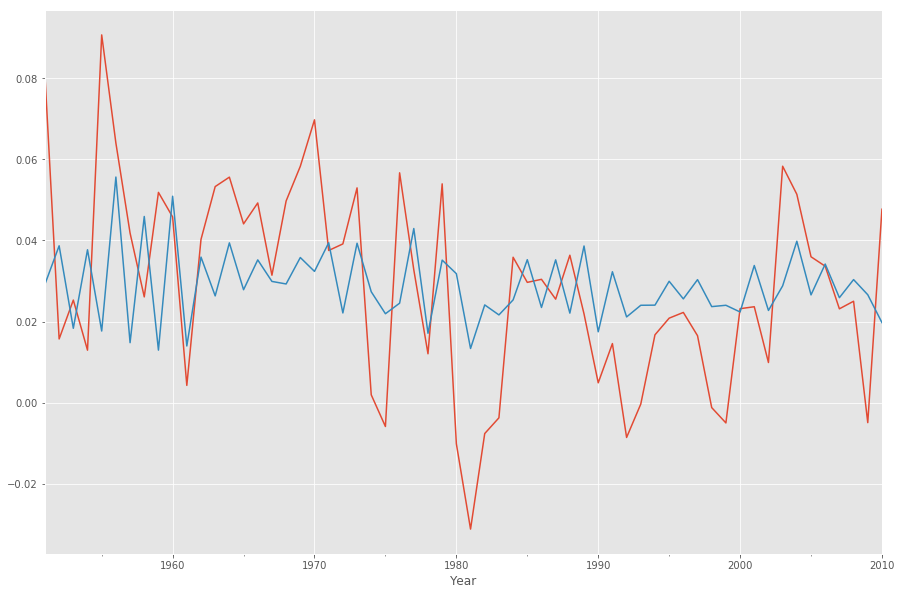

In [95]:
ts_diff.plot()
results_ARIMA.fittedvalues.plot()

In [96]:
ts_diff.sum()

1.7270300641609673

In [97]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.tail()

Year
2006-01-01    0.034183
2007-01-01    0.025891
2008-01-01    0.030354
2009-01-01    0.026620
2010-01-01    0.019756
dtype: float64

In [98]:
predictions_ARIMA_diff.sum()

1.7323460665860864

In [99]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.tail()

Year
2006-01-01    1.629725
2007-01-01    1.655617
2008-01-01    1.685970
2009-01-01    1.712591
2010-01-01    1.732346
dtype: float64

In [100]:
ts.ix[0]

C:\Users\sande\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


7.3963352938008082

In [101]:
predictions_ARIMA_log = pd.Series(ts.ix[0], index=ts.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.tail()

Year
2006-01-01    9.026061
2007-01-01    9.051952
2008-01-01    9.082306
2009-01-01    9.108926
2010-01-01    9.128681
dtype: float64

In [103]:
co2_df['TotalARIMA'] = np.exp(predictions_ARIMA_log)

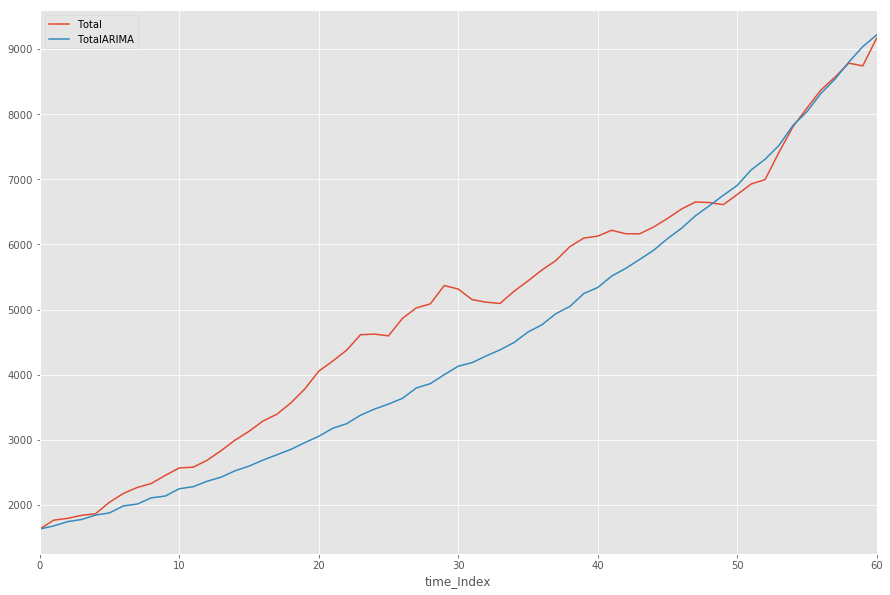

In [104]:
co2_df.plot(kind="line", x="time_Index", y = ["Total", "TotalARIMA"])

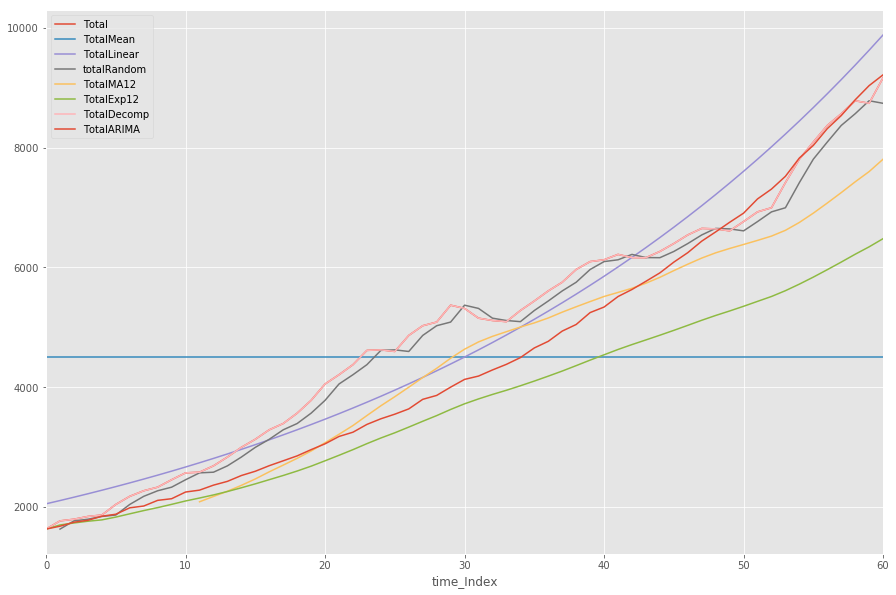

In [106]:
co2_df.plot(kind="line", x="time_Index", y = ["Total", "TotalMean", "TotalLinear", "totalRandom",
                                             "TotalMA12", "TotalExp12", "TotalDecomp", "TotalARIMA"])